# CI6227 Project
Team Miners

## This notebook reads data and does important visualization

In [35]:
import catboost
print(catboost.__version__)
!python --version

import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
import catboost
from catboost import *
from catboost import datasets
import chart_studio.plotly as ply
import plotly.graph_objects as go

0.17.4
Python 2.7.10


In [2]:
!head data.csv

Host_Gender,Latitude,Longitude,Area,Room_type,Minimum_nights,review_per_month,total_reviews,price
F,40.76513837311219,-73.7717992780513,Queens,Entire room/apt,3,4.72,123,Medium
F,40.767728375993826,-73.77945283434039,Brooklyn,Private room,2,1.34,138,Medium
F,40.76432989358729,-73.77253032210264,Inwood,Entire room/apt,4,2.97,101,Medium
M,40.76367145396922,-73.77015095853046,Manhattan,Entire room/apt,5,4.51,96,High
F,40.76596688813258,-73.77745556900533,Manhattan,Private room,3,7.31,204,Medium
M,40.76453178316548,-73.77791216471914,Manhattan,Private room,1,14.24,119,Medium
M,40.76136705782038,-73.77217479148787,Brooklyn,Private room,2,4.53,74,Medium
M,40.766567566683996,-73.7740837214047,Brooklyn,Private room,2,9.16,148,Medium
F,40.760212884468466,-73.776033776109,Inwood,Entire room/apt,3,1.88,5,Medium


## Loading data as Pandas DataFrame and getting info

In [15]:
df = pd.read_csv('data.csv')
df.head()

,Host_Gender,Latitude,Longitude,Area,Room_type,Minimum_nights,review_per_month,total_reviews,price
0,F,40.765138,-73.771799,Queens,Entire room/apt,3,4.72,123,Medium
1,F,40.767728,-73.779453,Brooklyn,Private room,2,1.34,138,Medium
2,F,40.764330,-73.772530,Inwood,Entire room/apt,4,2.97,101,Medium
3,M,40.763671,-73.770151,Manhattan,Entire room/apt,5,4.51,96,High
4,F,40.765967,-73.777456,Manhattan,Private room,3,7.31,204,Medium


In [44]:
# Gets information about the dataset like, 
# :total values in each column,
# :null/not null,
# :datatype,
# :memory occupied, etc
print("Dataframe shape: ", df.shape);
print()
df.info()

Dataframe shape:  (100000, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Host_Gender         100000 non-null object
Latitude            100000 non-null float64
Longitude           100000 non-null float64
Area                100000 non-null object
Room_type           100000 non-null object
Minimum_nights      100000 non-null int64
review_per_month    100000 non-null float64
total_reviews       100000 non-null int64
price               100000 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 6.9+ MB


In [40]:
# Give the number of columns with different datatypes are there
df.get_dtype_counts()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

`get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()



float64    3
int64      2
object     4
dtype: int64

In [46]:
# Get statistical information about the numerical columns in the dataframe
df.describe()

,Latitude,Longitude,Minimum_nights,review_per_month,total_reviews
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,40.765011,-73.775001,3.00410,5.003442,133.279310
std,0.002893,0.002889,1.28948,4.084739,97.983778
min,40.760000,-73.780000,1.00000,0.000000,1.000000
25%,40.762513,-73.777511,2.00000,1.880000,60.000000
50%,40.765019,-73.775001,3.00000,3.750000,120.000000
75%,40.767513,-73.772502,4.00000,7.500000,180.000000
max,40.770000,-73.770000,5.00000,15.000000,500.000000


## Finding correlation in data w.r.t. review_per_month

In [55]:
corr=df.corr()['review_per_month']
corr[np.argsort(corr, axis=0)[::-1]]

review_per_month    1.000000
total_reviews       0.208792
Latitude            0.000325
Longitude          -0.000260
Minimum_nights     -0.476571
Name: review_per_month, dtype: float64

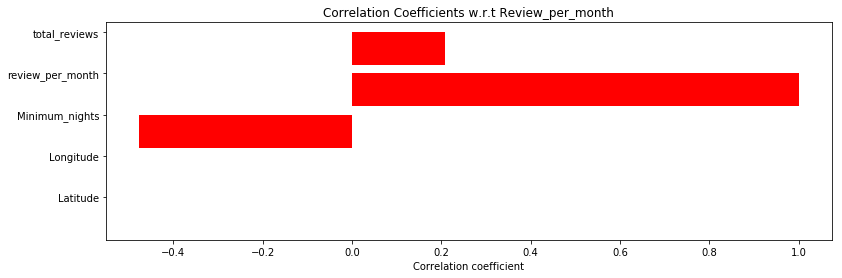

In [67]:
# Plotting correlations
num_feat=df.columns[df.dtypes!=object]
num_feat=num_feat
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.review_per_month.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(13,4))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Review_per_month");

In [77]:
df.head(100)

,Host_Gender,Latitude,Longitude,Area,Room_type,Minimum_nights,review_per_month,total_reviews,price
0,F,40.765138,-73.771799,Queens,Entire room/apt,3,4.72,123,Medium
1,F,40.767728,-73.779453,Brooklyn,Private room,2,1.34,138,Medium
2,F,40.764330,-73.772530,Inwood,Entire room/apt,4,2.97,101,Medium
3,M,40.763671,-73.770151,Manhattan,Entire room/apt,5,4.51,96,High
4,F,40.765967,-73.777456,Manhattan,Private room,3,7.31,204,Medium
...,...,...,...,...,...,...,...,...,...
95,M,40.765809,-73.772582,Brooklyn,Private room,3,9.90,219,Medium
96,M,40.766726,-73.778148,Brooklyn,Private room,1,8.07,471,Medium
97,F,40.762457,-73.779213,Inwood,Private room,1,5.17,92,Low
98,M,40.765348,-73.778873,Inwood,Private room,2,0.27,93,Low
